# Checking to see if younger soccer players are more expensive to buy.
This is checking to see what the age trends are through football and wether age has any correlation with price in the transfer market.

First, the imports:

In [12]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [17]:
df = pd.read_csv('data.csv')
len(df)

10023

## Note for the editor

### Most changes/removals are because we are trying to calculate trends of how parent clubs have assesed the value of their young players, and what clubs think 

1. Loan trasfers are not included because we are simply looking at permananet transfers, by taking a loan, the amount of risk taken by a club is not as significant.

2. Transfers within the club were removed. Transfermarkt also adds players who have been promoted from the academy to the first team as a transfer, the registration change is not enough as a transfer. 

# Hypothesis: Younger Players are more expensive to buy than older players

## Null Hypothesis: There is absolutely no correlation between age and money paid for players.

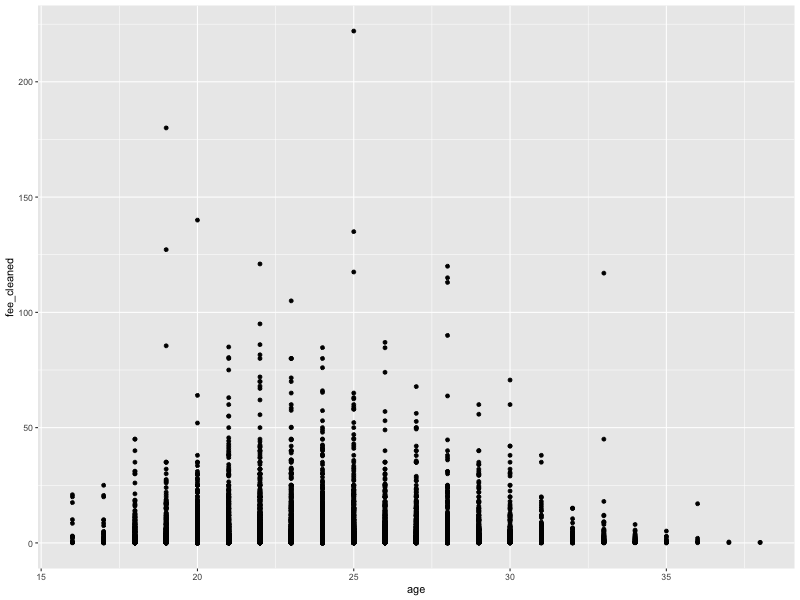

In [18]:
%%R -i df -w 800 -h 600

ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point()

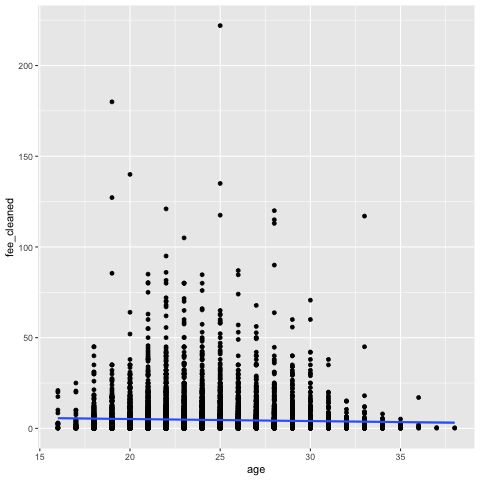

In [19]:
%%R

ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)

In [20]:
%%R

model <- lm(age ~ fee_cleaned, data=df)

summary(model)


Call:
lm(formula = age ~ fee_cleaned, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3832 -2.3800 -0.3557  2.6239 13.6198 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.383937   0.039590 615.906  < 2e-16 ***
fee_cleaned -0.015669   0.003725  -4.207 2.61e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.561 on 10021 degrees of freedom
Multiple R-squared:  0.001763,	Adjusted R-squared:  0.001663 
F-statistic:  17.7 on 1 and 10021 DF,  p-value: 2.612e-05

